In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_x = train_data.drop(columns='label')
train_y = train_data['label']

In [4]:
train_x.shape, train_y.shape
#Samples X Features for train_x. train_y is a 1-d array

((42000, 784), (42000,))

In [5]:
train_x_array = np.array(train_x)
train_y_array = np.array(train_y)
# test_x_array = np.array(test_x)
# test_y_array = np.array(test_y)

train_x_array.shape, train_y_array.shape

((42000, 784), (42000,))

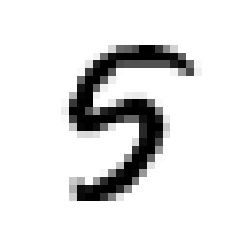

In [6]:
some_digit = train_x_array[8]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [7]:
some_digit_label = train_y_array[8]
some_digit_label

5

# Training a binary classifier(5-detector)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_x_array, train_y_array, test_size=0.2) 

In [9]:
y_train = (Y_train == 5).astype(int)
y_test = (Y_test == 5).astype(int)

In [10]:
#CHoosing the SGD classifier
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [11]:
sgd.predict([some_digit])

array([1])

In [12]:
#Evaluating the classifier using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(sgd,X_train,y_train,cv=5,scoring='accuracy')

array([0.95625   , 0.95416667, 0.96145833, 0.96041667, 0.96889881])

In this case, even a dummy classifier will work well, cuz the data is skewed with respect to 5(that is, the entire dataset itself has only less number of 5 in it)

In [13]:
#Dummy classifier
from sklearn.base import BaseEstimator

class DummyClassifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1))#Always predicts an image to be NOT 5

In [14]:
dummy = DummyClassifier()

cross_val_score(dummy, X_train, y_train, cv=5, scoring='accuracy')

array([0.91607143, 0.91190476, 0.9047619 , 0.90744048, 0.91369048])

In [15]:
#Confusion matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd, X_train, y_train, cv=5)

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[29926,   676],
       [  660,  2338]])

In [17]:
#IN case of perfect prediction(highly unlikely)
y_predict_perfect = y_train
confusion_matrix(y_train, y_predict_perfect)

array([[30602,     0],
       [    0,  2998]])

In [18]:
#Precision and Recall for classifiers
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_train_pred)

0.7757133377571334

In [19]:
recall_score(y_train, y_train_pred)

0.7798532354903269

In [20]:
#F1 SCORE : Harmonic mean of precision and recall. Gives more effect if values are low. Thus, for high F1 score, both precision and recall HAVE to be high
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)

0.7777777777777778

In [35]:
#Setting the threshold by ourselves
#For an individual instance
y_some_digit = sgd.decision_function([some_digit])
y_some_digit

array([4504.88673607])

In [39]:
#Prediction
threshold = 4000
y_some_digit_pred = (y_some_digit > threshold)
y_some_digit_pred

array([ True])

In [40]:
#Setting threshold for all values, by getting the entire decision parameter evaluations

y_dec_eval = cross_val_predict(sgd, X_train, y_train, cv=5, method='decision_function')

In [42]:
#Computing precision recall for all possible values of threshold using precison_recall_curve
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_dec_eval)

In [46]:
precisions.shape, recalls.shape, thresholds.shape

((33595,), (33595,), (33594,))

In [49]:
#Plotting precisions and recalls as a function of thresholds
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.legend()

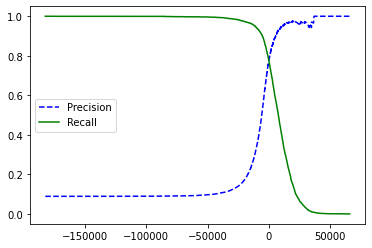

In [50]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

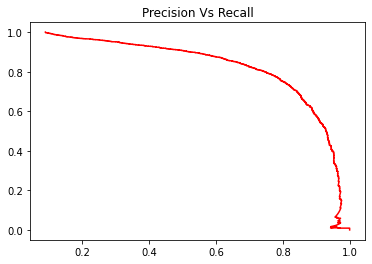

In [52]:
#PLotting precision against recall directly
plt.plot(precisions[:-1], recalls[:-1], 'r-')
plt.title('Precision Vs Recall')
plt.show()

In [ ]:
you